In [1]:
import numpy as np
from math import pi
from numpy import cos, sin, rad2deg
from skimage import io
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel, sobel_h, sobel_v, threshold_mean,threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola, threshold_triangle, threshold_yen, gaussian, apply_hysteresis_threshold
from skimage.feature import canny,corner_harris, corner_peaks
from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line
# from matplotlib.pyplot import figure, imshow, title, subplot, plot, show, plot, xlabel, ylabel, axis
from matplotlib.pyplot import figure, imshow, title, subplot, plot, show, plot, xlabel, ylabel, axis, colorbar, clim,Circle
import sys
import time
sys.setrecursionlimit(1500)




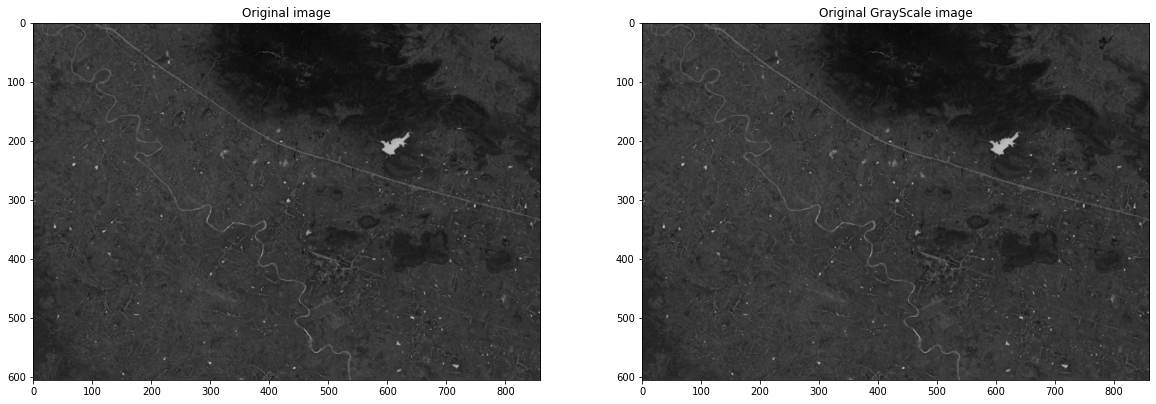

(605, 860)


In [2]:
_img = io.imread('final.png')
# _img=io.imread("raa.png")
# use the below line if internet is not available and comment the above line

# _img = imread('riv1.png') 
# _img=io.imread("im.png")

figure(figsize=(20,17))

subplot(1,2,1)
title("Original image")
imshow(_img, cmap="gray")
img = _img
if(len(_img.shape) == 3):
    img = rgb2gray(_img)
    img = img*255

subplot(1,2,2)
title("Original GrayScale image")
imshow(img, cmap="gray")

show()
print(img.shape)

0.06459936150366904


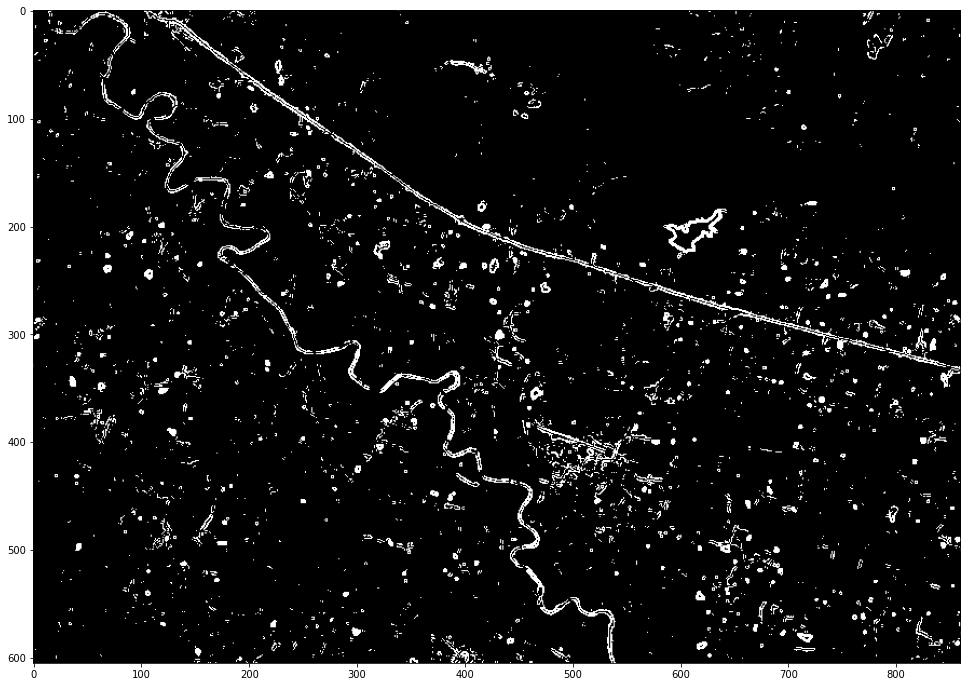

In [3]:
g = img
g = sobel(g)
print(threshold_otsu(g))
g = g>threshold_otsu(g)
figure(figsize=(17,12))
imshow(g, cmap="gray")

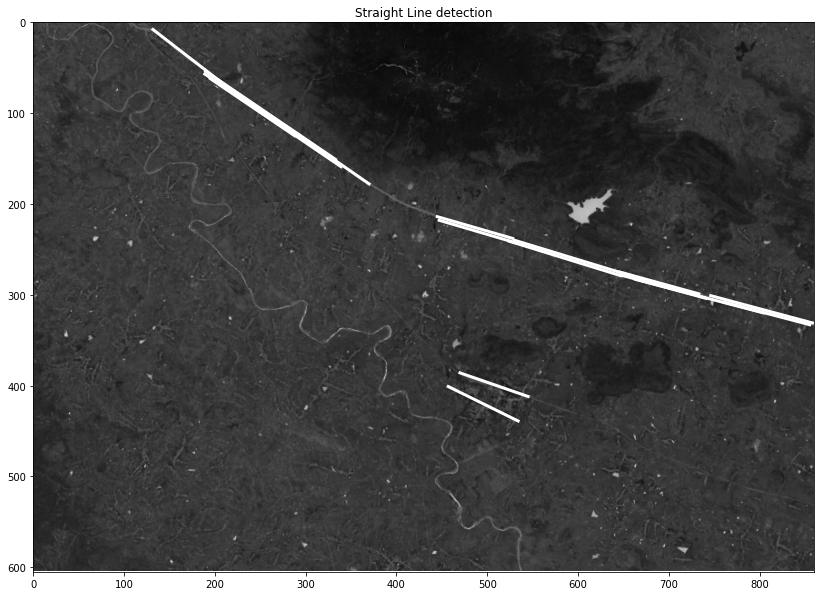

In [4]:
temp = (canny(img))
# temp = _imgSobel.cimshowy()/255

# temp = g

N, M = temp.shape

lines1 = probabilistic_hough_line(
    temp, threshold=88, line_length=15, line_gap=2)

figure(figsize=(14, 11))
imshow(img, cmap="gray")

# for line in lines1:
#     p0, p1 = line
#     plot((p0[0], p1[0]), (p0[1], p1[1]), color='b', linewidth=1)


lines = probabilistic_hough_line(
    temp, threshold=100, line_length=75, line_gap = 5)

for line in lines:
    p0, p1 = line
    plot((p0[0], p1[0]), (p0[1], p1[1]), color='w', linewidth=3)

axis((0, M, N, 0))
title("Straight Line detection")
show()


In [5]:

def floodFill(image, sr: int, sc: int):
    mxx =0;
    color = True
    newColor = False
    if color == newColor:
        return image

    stack = [(sr, sc)]
    while stack:
        # mxx = max(len(stack), mxx)
        x, y = stack.pop()
        if image[x][y] != color:
            continue

        image[x][y] = newColor

        if x > 0:
            stack.append((x-1, y))
        if y > 0:
            stack.append((x, y-1))
        if x < len(image)-1:
            stack.append((x+1, y))
        if y < len(image[0])-1:
            stack.append((x, y+1))
        if x > 0 and y > 0:
            stack.append((x-1, y-1))
        if x > 0 and y < len(image[0])-1:
            stack.append((x-1, y+1))
        if x < len(image)-1 and y > 0:
            stack.append((x+1, y-1))
        if x < len(image)-1 and y < len(image[0])-1:
            stack.append((x+1, y+1))

    return image


In [6]:

def MfloodFill(image, sr: int, sc: int):
    mxx =0;
    color = True
    newColor = False
    if color == newColor:
        return image

    stack = [(sr, sc)]
    while stack:
        mxx = max(len(stack), mxx)
        x, y = stack.pop()
        if image[x][y] != color:
            continue

        image[x][y] = newColor

        if x > 0:
            stack.append((x-1, y))
        if y > 0:
            stack.append((x, y-1))
        if x < len(image)-1:
            stack.append((x+1, y))
        if y < len(image[0])-1:
            stack.append((x, y+1))
        if x > 0 and y > 0:
            stack.append((x-1, y-1))
        if x > 0 and y < len(image[0])-1:
            stack.append((x-1, y+1))
        if x < len(image)-1 and y > 0:
            stack.append((x+1, y-1))
        if x < len(image)-1 and y < len(image[0])-1:
            stack.append((x+1, y+1))

    return image,mxx


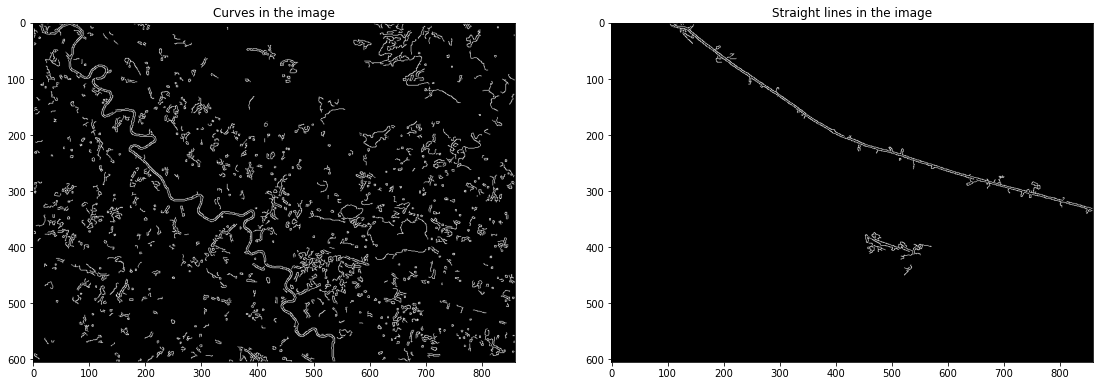

In [7]:
# temp = (canny(masking(img, gaussian)))
# temp = _imgSobel.copy()/255
for line in lines:
    p0, p1 = line
    # print(p0, p1)
    M, N = temp.shape
    for i in range(p0[0]-3, p0[0]+3):
        for j in range(p0[1]-3, p0[1]+3):
            if i>=0 and i<N and j>=0 and j<M:
                if temp[j,i] == True:
                    floodFill(temp, j, i)
                    break
    
    for i in range(p1[0]-13, p1[0]+13):
        for j in range(p1[1]-3, p1[1]+3):
            if i>=0 and i<temp.shape[1] and j>=0 and j<temp.shape[0] and temp[j,i] == True:
                floodFill(temp, j, i)
                break

# plot(i, j, color='red', marker='+', linestyle='none')
# axis((0,M,N,0))
figure(figsize=(19,14))
subplot(1,2,1)
imshow(temp, cmap="gray")
title("Curves in the image")

straight = canny(img) ^ temp
subplot(1,2,2)
imshow(straight, cmap="gray")
title("Straight lines in the image")

show()

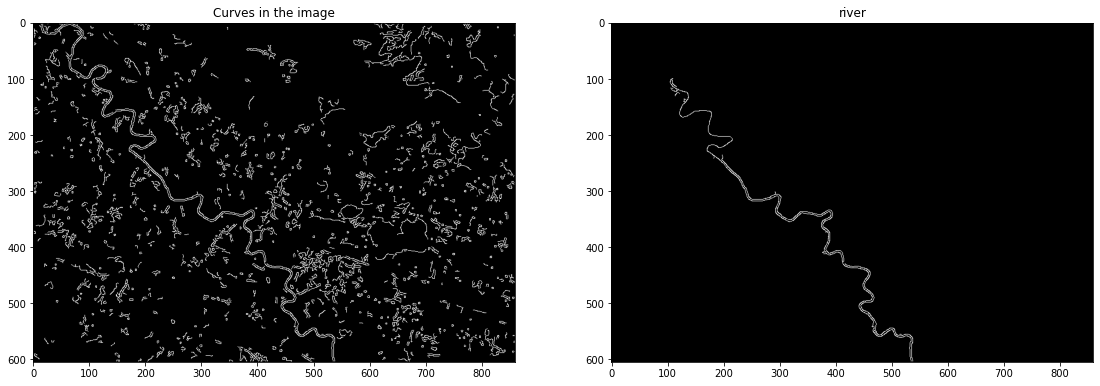

In [9]:
mxx = 0
# print (temp)
imcopy = temp.copy()
# imshow(temp, cmap="gray")

for i in range (0, temp.shape[0]):
    for j in range (0, temp.shape[1]):
        if imcopy[i,j] == True:
            _,k = MfloodFill(imcopy, i, j)
            if(k>mxx):
                mxx = k
                a,b = i,j
imcopy = temp.copy()

flo,_ = MfloodFill(imcopy, a, b)
flo = flo ^ temp
figure(figsize=(19,14))
subplot(1,2,1)
imshow(temp, cmap="gray")
title("Curves in the image")
subplot(1,2,2)
title("river")

imshow(flo, cmap="gray")